In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [54]:
# Membaca file CSV dan langsung mengonversi kolom 'host_since' ke format datetime
df = pd.read_csv(
    "Listings.csv",
    encoding="ISO-8859-1",
    low_memory=False,
    parse_dates=['host_since']  # kolom tanggal
)

In [55]:
# Filter baris di mana city = 'Paris' dan pilih kolom tertentu
df_paris = df.query("city == 'Paris'").loc[:, ['host_since', 'neighbourhood', 'city', 'accommodates', 'price']]

In [56]:
# Tampilkan hasil
print(df_paris.head())
print(df_paris.shape)

  host_since      neighbourhood   city  accommodates  price
0 2011-12-03  Buttes-Montmartre  Paris             2     53
1 2013-11-29  Buttes-Montmartre  Paris             2    120
2 2014-07-31             Elysee  Paris             2     89
3 2013-12-17          Vaugirard  Paris             2     58
4 2014-12-14              Passy  Paris             2     60
(64690, 5)


In [57]:
# 1️⃣ Cek informasi umum dataset
print(df_paris.info())

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB
None


In [58]:
# 2️⃣ Cek nilai yang hilang (missing values)
print("\nJumlah nilai yang hilang per kolom:")
print(df_paris.isna().sum())

(df_paris.isna().mean() * 100).round(2)


Jumlah nilai yang hilang per kolom:
host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64


host_since       0.05
neighbourhood    0.00
city             0.00
accommodates     0.00
price            0.00
dtype: float64

In [59]:
# 3️⃣ Gunakan describe() untuk ringkasan statistik kolom numerik
print("\nRingkasan statistik kolom numerik:")
print(df_paris.describe())


Ringkasan statistik kolom numerik:
                          host_since  accommodates         price
count                          64657  64690.000000  64690.000000
mean   2015-11-01 11:06:05.528867584      3.037997    113.096445
min              2008-08-30 00:00:00      0.000000      0.000000
25%              2014-03-09 00:00:00      2.000000     59.000000
50%              2015-07-07 00:00:00      2.000000     80.000000
75%              2017-05-29 00:00:00      4.000000    120.000000
max              2021-02-07 00:00:00     16.000000  12000.000000
std                              NaN      1.588766    214.433668


💶 Rata-Rata Harga Listing Airbnb di Paris per Neighbourhood

 No       neighbourhood  price
  1        Menilmontant  74.94
  2     Buttes-Chaumont  82.69
  3   Buttes-Montmartre  87.21
  4             Reuilly  89.06
  5          Popincourt  90.56
  6            Gobelins  98.11
  7        Observatoire 101.87
  8 Batignolles-Monceau 102.61
  9   Enclos-St-Laurent 102.97
 10           Vaugirard 106.83
 11               Opera 119.04
 12            Pantheon 122.66
 13              Temple 138.45
 14      Hotel-de-Ville 144.47
 15              Bourse 149.50
 16          Luxembourg 155.64
 17      Palais-Bourbon 156.86
 18               Passy 161.14
 19              Louvre 175.38
 20              Elysee 210.54


C:\Users\Ricki\AppData\Local\Temp\ipykernel_5244\4156647693.py:45: UserWarning: Glyph 128182 (\N{BANKNOTE WITH EURO SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Ricki\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128182 (\N{BANKNOTE WITH EURO SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


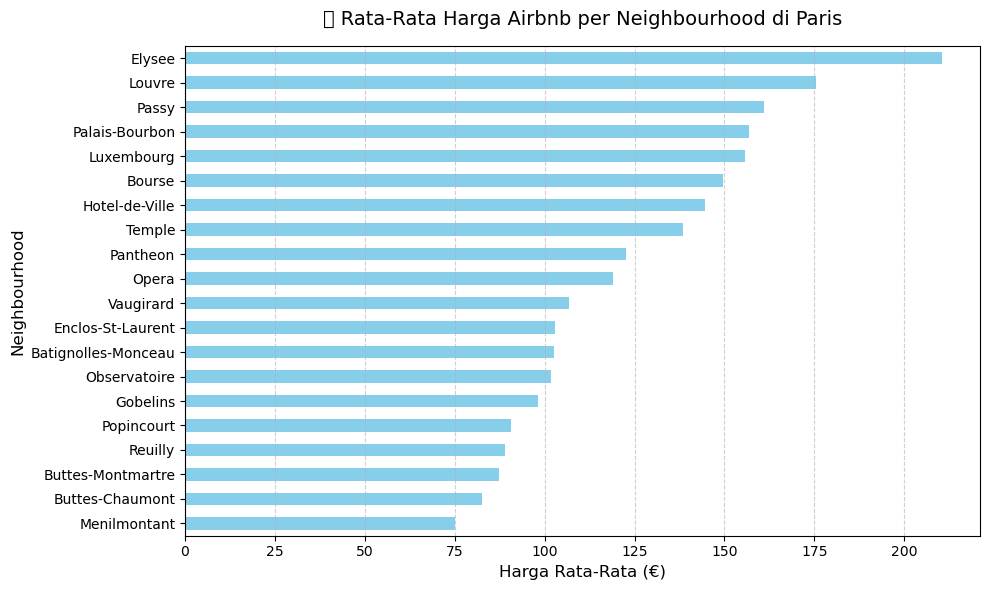

In [60]:
# 1️⃣ Pastikan kolom price bersih & numerik
df_paris['price'] = (
    df_paris['price']
    .replace(r'[\$,€]', '', regex=True)
    .astype(float)
)

# 2️⃣ Kelompokkan berdasarkan neighbourhood dan hitung rata-rata harga
paris_listings_neighbourhood = (
    df_paris
    .groupby('neighbourhood', as_index=False)['price']
    .mean()
    .sort_values(by='price', ascending=True)
)

# 3️⃣ Bulatkan harga ke 2 desimal
paris_listings_neighbourhood['price'] = paris_listings_neighbourhood['price'].round(2)

# 4️⃣ Tambahkan kolom nomor urut (ranking)
paris_listings_neighbourhood.insert(0, 'No', range(1, len(paris_listings_neighbourhood) + 1))

# 5️⃣ Tampilkan hasil rapi
print("💶 Rata-Rata Harga Listing Airbnb di Paris per Neighbourhood\n")
print(paris_listings_neighbourhood.to_string(index=False))

# 6️⃣ Buat horizontal bar chart
paris_listings_neighbourhood.plot(
    kind='barh',                # horizontal bar chart
    x='neighbourhood',          # sumbu Y (nama neighbourhood)
    y='price',                  # sumbu X (rata-rata harga)
    figsize=(10, 6),            # ukuran figure
    color='skyblue',            # warna bar
    legend=False                # tidak perlu legend
)

# 7️⃣ Tambahkan judul dan label sumbu
plt.title('💶 Rata-Rata Harga Airbnb per Neighbourhood di Paris', fontsize=14, pad=15)
plt.xlabel('Harga Rata-Rata (€)', fontsize=12)
plt.ylabel('Neighbourhood', fontsize=12)

# 8️⃣ Tambahkan grid horizontal
plt.grid(axis='x', linestyle='--', alpha=0.6)

# 9️⃣ Rapikan layout & tampilkan grafik
plt.tight_layout()
plt.show()

🏙️ Neighbourhood termahal di Paris: Elysee

💶 Rata-Rata Harga Airbnb di Elysee berdasarkan Jumlah Akomodasi

 No  accommodates  price
  1             1  79.52
  2             3 152.83
  3             2 155.10
  4             4 212.10
  5             5 328.82
  6             6 355.51
  7             8 405.52
  8             7 411.54
  9             9 440.27
 10            10 500.86
 11            12 529.62
 12            16 800.00
 13            11 805.00
 14            13 842.50
 15            14 971.00


C:\Users\Ricki\AppData\Local\Temp\ipykernel_5244\807362176.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Ricki\AppData\Local\Temp\ipykernel_5244\807362176.py:63: UserWarning: Glyph 128182 (\N{BANKNOTE WITH EURO SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Ricki\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128182 (\N{BANKNOTE WITH EURO SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


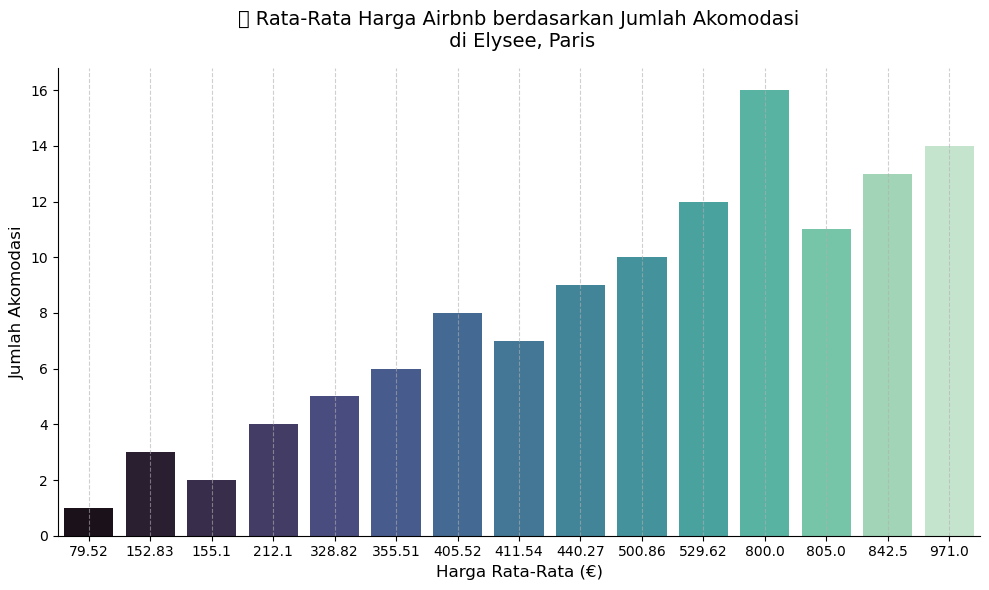

In [61]:
# 1️⃣ Pastikan kolom 'price' sudah bersih dan numerik
df_paris['price'] = (
    df_paris['price']
    .replace(r'[\$,€]', '', regex=True)
    .astype(float)
)

# 2️⃣ Temukan neighbourhood termahal
most_expensive_neighbourhood = (
    paris_listings_neighbourhood
    .sort_values(by='price', ascending=False)
    .iloc[0]['neighbourhood']
)

print(f"🏙️ Neighbourhood termahal di Paris: {most_expensive_neighbourhood}\n")

# 3️⃣ Filter data untuk neighbourhood tersebut
df_expensive = df_paris.query("neighbourhood == @most_expensive_neighbourhood")

# 🔹 4️⃣ Hapus baris dengan accommodates = 0
df_expensive = df_expensive[df_expensive['accommodates'] > 0]

# 5️⃣ Kelompokkan berdasarkan 'accommodates' dan hitung rata-rata harga
paris_listings_accomodations = (
    df_expensive
    .groupby('accommodates', as_index=False)['price']
    .mean()
    .sort_values(by='price', ascending=True)
)

# 6️⃣ Bulatkan harga ke 2 desimal
paris_listings_accomodations['price'] = paris_listings_accomodations['price'].round(2)

# 7️⃣ Tambahkan kolom nomor urut
paris_listings_accomodations.insert(0, 'No', range(1, len(paris_listings_accomodations) + 1))

# 8️⃣ Tampilkan hasil rapi
print(f"💶 Rata-Rata Harga Airbnb di {most_expensive_neighbourhood} berdasarkan Jumlah Akomodasi\n")
print(paris_listings_accomodations.to_string(index=False))

# 9️⃣ Buat horizontal bar chart rata-rata harga berdasarkan jumlah akomodasi
plt.figure(figsize=(10, 6))
sns.barplot(
    data=paris_listings_accomodations,
    x='price',
    y='accommodates',
    palette='mako'  # palet warna elegan
)

# 10️⃣ Tambahkan judul dan label sumbu
plt.title(f"💶 Rata-Rata Harga Airbnb berdasarkan Jumlah Akomodasi\n di {most_expensive_neighbourhood}, Paris",
          fontsize=14, pad=15)
plt.xlabel("Harga Rata-Rata (€)", fontsize=12)
plt.ylabel("Jumlah Akomodasi", fontsize=12)

# 11️⃣ Hapus garis atas & kanan agar lebih clean
sns.despine()

# 12️⃣ Tambahkan grid horizontal
plt.grid(axis='x', linestyle='--', alpha=0.6)

# 13️⃣ Tampilkan grafik
plt.tight_layout()
plt.show()

C:\Users\Ricki\AppData\Local\Temp\ipykernel_5244\200061249.py:17: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  .resample('Y')  # Y = yearly frequency


📈 Jumlah Host Baru & Rata-Rata Harga Airbnb di Paris per Tahun

 No  year  avg_price  new_hosts
  1  2008      77.75          4
  2  2009     159.64        106
  3  2010     125.03        416
  4  2011     124.83       1339
  5  2012     111.58       4592
  6  2013     107.10       8142
  7  2014     100.25      10922
  8  2015     103.65      12147
  9  2016     114.16       8871
 10  2017     108.66       4585
 11  2018     138.21       4294
 12  2019     129.76       5694
 13  2020     141.46       3412
 14  2021      93.49        133


C:\Users\Ricki\AppData\Local\Temp\ipykernel_5244\200061249.py:60: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Ricki\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


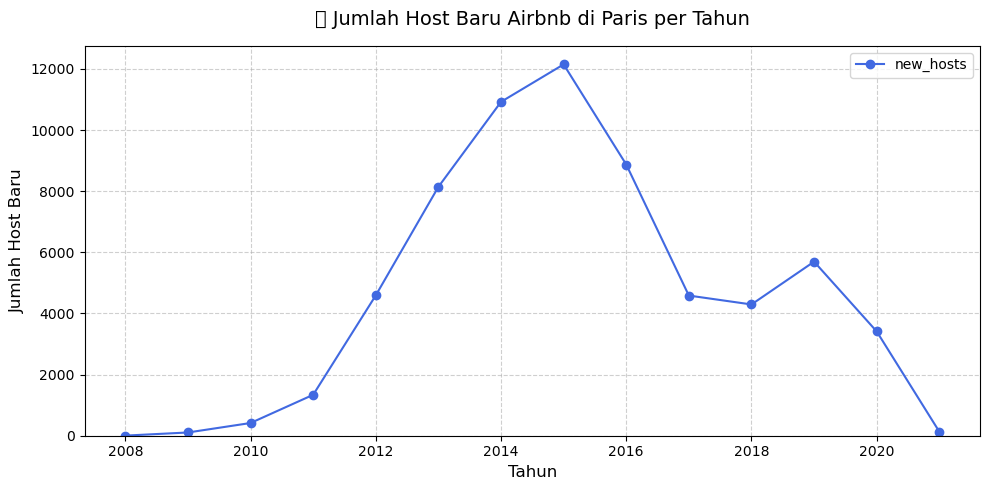

C:\Users\Ricki\AppData\Local\Temp\ipykernel_5244\200061249.py:78: UserWarning: Glyph 128182 (\N{BANKNOTE WITH EURO SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Ricki\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128182 (\N{BANKNOTE WITH EURO SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


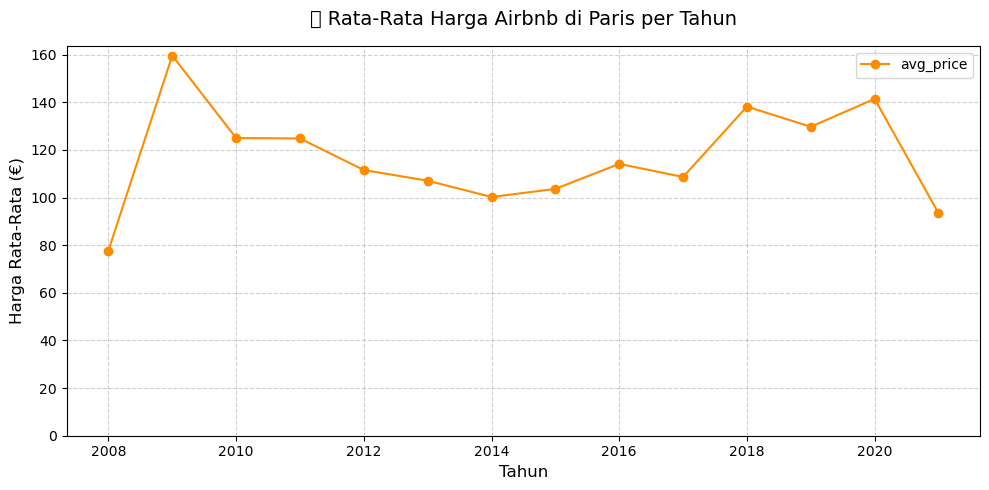

C:\Users\Ricki\AppData\Local\Temp\ipykernel_5244\200061249.py:128: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Ricki\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


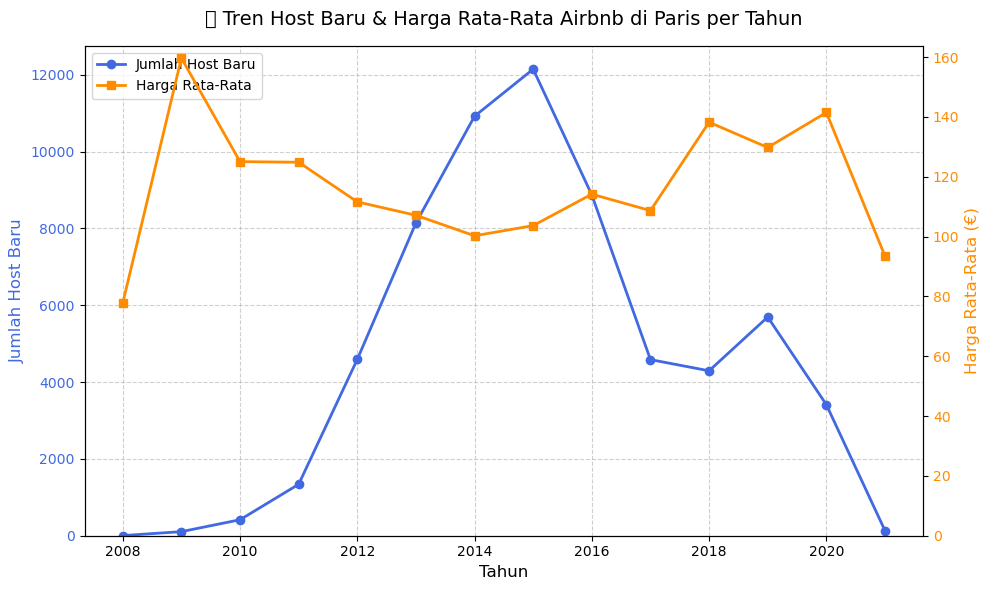

In [62]:

# 1️⃣ Pastikan kolom 'host_since' sudah dalam format datetime
df_paris['host_since'] = pd.to_datetime(df_paris['host_since'], errors='coerce')

# 2️⃣ Pastikan kolom 'price' sudah numerik
df_paris['price'] = (
    df_paris['price']
    .replace(r'[\$,€]', '', regex=True)
    .astype(float)
)

# 3️⃣ Set index ke 'host_since'
df_paris = df_paris.set_index('host_since')

# 4️⃣ Gunakan resample per tahun dan hitung rata-rata harga & jumlah host
paris_listings_over_time = (
    df_paris
    .resample('Y')  # Y = yearly frequency
    .agg({
        'price': 'mean',
        'city': 'count'  # menghitung jumlah baris = host baru
    })
    .rename(columns={'price': 'avg_price', 'city': 'new_hosts'})
)

# 5️⃣ Ubah format index tahun agar lebih rapi (tampilkan hanya tahun)
paris_listings_over_time.index = paris_listings_over_time.index.year

# 6️⃣ Bulatkan rata-rata harga ke 2 desimal
paris_listings_over_time['avg_price'] = paris_listings_over_time['avg_price'].round(2)

# 7️⃣ Reset index agar menjadi tabel biasa
paris_listings_over_time = paris_listings_over_time.reset_index().rename(columns={'host_since': 'year'})

# 8️⃣ Tambahkan kolom nomor urut
paris_listings_over_time.insert(0, 'No', range(1, len(paris_listings_over_time) + 1))

# 9️⃣ Tampilkan hasil
print("📈 Jumlah Host Baru & Rata-Rata Harga Airbnb di Paris per Tahun\n")
print(paris_listings_over_time.to_string(index=False))

# =============================================================
# 📊 10️⃣ Visualisasi: Dua Grafik Garis (Line Charts)
# =============================================================

# Grafik 1: Jumlah Host Baru per Tahun
paris_listings_over_time.plot(
    kind='line',
    x='year',
    y='new_hosts',
    figsize=(10, 5),
    color='royalblue',
    marker='o'
)

plt.title('📈 Jumlah Host Baru Airbnb di Paris per Tahun', fontsize=14, pad=15)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Jumlah Host Baru', fontsize=12)
plt.ylim(0)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Grafik 2: Rata-Rata Harga per Tahun
paris_listings_over_time.plot(
    kind='line',
    x='year',
    y='avg_price',
    figsize=(10, 5),
    color='darkorange',
    marker='o'
)

plt.title('💶 Rata-Rata Harga Airbnb di Paris per Tahun', fontsize=14, pad=15)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Harga Rata-Rata (€)', fontsize=12)
plt.ylim(0)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# =============================================================
# 📊 11️⃣ Visualisasi: Dua Grafik Garis (Line Charts)
# =============================================================


# Membuat figure & axis utama
fig, ax1 = plt.subplots(figsize=(10, 6))

# 🔹 Sumbu kiri: Jumlah host baru
color_hosts = 'royalblue'
ax1.set_xlabel('Tahun', fontsize=12)
ax1.set_ylabel('Jumlah Host Baru', color=color_hosts, fontsize=12)
ax1.plot(
    paris_listings_over_time['year'],
    paris_listings_over_time['new_hosts'],
    color=color_hosts,
    marker='o',
    linewidth=2,
    label='Jumlah Host Baru'
)
ax1.tick_params(axis='y', labelcolor=color_hosts)
ax1.set_ylim(0)

# 🔸 Sumbu kanan: Rata-rata harga
ax2 = ax1.twinx()
color_price = 'darkorange'
ax2.set_ylabel('Harga Rata-Rata (€)', color=color_price, fontsize=12)
ax2.plot(
    paris_listings_over_time['year'],
    paris_listings_over_time['avg_price'],
    color=color_price,
    marker='s',
    linewidth=2,
    label='Harga Rata-Rata'
)
ax2.tick_params(axis='y', labelcolor=color_price)
ax2.set_ylim(0)

# 🔹 Tambahkan judul dan grid
plt.title('📊 Tren Host Baru & Harga Rata-Rata Airbnb di Paris per Tahun', fontsize=14, pad=15)
ax1.grid(True, linestyle='--', alpha=0.6)

# 🔸 Gabungkan legend dari kedua sumbu
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.tight_layout()
plt.show()
